In [1]:
import sys
sys.path.append("..")  # Go up one directory from notebooks to Customer_Segmentation_DevOps
data_filepath = "../data/customer_segmentation.csv"

In [2]:
from src.data.cleaning import prepare_data, drop_columns, drop_c_id, clean_data
from src.data.encoding import encode_df, get_dummies_df

from src.descriptive_stats.insights import segments_insights, kmeans_summary, cluster_summary, installments_analysis, customers_insights, recency, payments_insights, prod_insights, customer_geography, get_frequencies, get_recency, concatenate_dataframes, get_monetary
from src.descriptive_stats.stats import describe_dataset, corr

from src.visualization.data_visualization import visualize_data, plot_average_spending_by_frequency, plot_payment_value_distribution
from src.visualization.clustering_visualization import plot_clusters, visualize_spectral_clusters

from src.dimensionality_reduction.comparison import pca_vs_spectral
from src.dimensionality_reduction.pca import encoding_PCA, pca_preprocessing, pca_ncomponents, pca 

from src.clustering.agglomerative.core import agglomerative_clustering
from src.clustering.agglomerative.analysis import dendogram 

from src.clustering.kmeans.core import clustering, choose
from src.clustering.kmeans.analysis import elbow_method, get_best_kmeans_params, silhouette_score_f

from src.clustering.pca_methods.core import pca_kmeans, pca_components
from src.clustering.pca_methods.insights import pca_insights, pca_insights2 

from src.clustering.ann_methods.core import ann_autoencoder, ann_fit_predict, conc_pca_ann, ann_clusters
from src.clustering.ann_methods.insights import ann_insigths 

from src.clustering.spectral.core import spectral_clustering
from src.clustering.spectral.analysis import show_silscores 

In [10]:
df = prepare_data(data_filepath)
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_type,payment_installments,...,customer_city,customer_state,order_item_id,product_id,seller_id,price,freight_value,seller_city,seller_state,product_category_name_english
0,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,boleto,1,...,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76,belo horizonte,SP,perfumery
1,86674ccaee19790309333210917b2c7d,1b338293f35549b5e480b9a3d7bbf3cd,delivered,2018-08-09 11:37:35,2018-08-09 14:35:19,2018-08-10 14:34:00,2018-08-14 18:51:47,2018-08-22 00:00:00,credit_card,5,...,ituverava,SP,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,116.90,18.92,belo horizonte,SP,perfumery
2,aee682982e18eb4714ce9f97b15af5e2,8858442ea4d5dc5bb9e118e8f728095d,delivered,2018-07-09 18:46:28,2018-07-11 03:45:45,2018-07-11 15:01:00,2018-07-12 18:14:35,2018-07-18 00:00:00,boleto,1,...,ribeirao das neves,MG,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,9.34,belo horizonte,SP,perfumery
3,d543201a9b42a1402ff97e65b439a48b,971bf8f42a9f8cb3ead257854905b454,delivered,2018-08-21 10:00:25,2018-08-21 10:50:54,2018-08-22 15:21:00,2018-08-28 18:58:22,2018-09-10 00:00:00,credit_card,2,...,gaspar,SC,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,116.90,22.75,belo horizonte,SP,perfumery
4,d543201a9b42a1402ff97e65b439a48b,971bf8f42a9f8cb3ead257854905b454,delivered,2018-08-21 10:00:25,2018-08-21 10:50:54,2018-08-22 15:21:00,2018-08-28 18:58:22,2018-09-10 00:00:00,credit_card,2,...,gaspar,SC,2,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,116.90,22.75,belo horizonte,SP,perfumery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13796,493ba21a937e956c5e0e4e26c9f1b7f9,408d74d06be5d5140bb933f248de1342,delivered,2018-07-15 09:56:32,2018-07-16 13:30:36,2018-07-27 07:26:00,2018-08-02 18:06:41,2018-07-26 00:00:00,boleto,1,...,sao paulo,SP,1,82d7b276f49e72ffce78d10b20518808,7c5b05cbdb5542049f38d90d7815b97d,19.99,7.40,sao paulo,SP,books_imported
13797,4a7cf245701068d38d441791b735e4bd,1d3b24ba06f2e3fa4bfa74fd70d2310f,delivered,2018-05-07 20:36:47,2018-05-07 20:51:50,2018-05-08 15:04:00,2018-05-09 22:38:53,2018-05-17 00:00:00,credit_card,1,...,sorocaba,SP,1,82d7b276f49e72ffce78d10b20518808,7c5b05cbdb5542049f38d90d7815b97d,18.99,7.39,sao paulo,SP,books_imported
13798,33f8dfc5a51063c31d7b12e9d43a45fc,8f7f4871646eb2fa410cc2d50b861317,delivered,2018-04-28 14:32:54,2018-04-28 14:53:18,2018-05-02 15:25:00,2018-05-03 23:51:56,2018-05-14 00:00:00,credit_card,1,...,sao paulo,SP,1,82d7b276f49e72ffce78d10b20518808,7c5b05cbdb5542049f38d90d7815b97d,18.99,7.39,sao paulo,SP,books_imported
13799,442a41b00a8a8bda35511fdf1eb65cc5,e42e2e8642f9c09100b6667e321c2811,invoiced,2018-07-11 22:27:32,2018-07-11 22:45:43,2018-07-11 22:45:43,2018-07-20 00:00:00,2018-07-20 00:00:00,credit_card,1,...,sao paulo,SP,1,5b668636d65ddf4e4109c6d8fb13ea56,7c5b05cbdb5542049f38d90d7815b97d,44.99,7.58,sao paulo,SP,books_imported


In [9]:
# df_01 = drop_columns(df)
# df_01

In [11]:
encoded_df = encode_df(df)
encoded_df

c:\Users\rawbe\anaconda3\envs\env_devops_project\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,onehotencoder__order_status_canceled,onehotencoder__order_status_delivered,onehotencoder__order_status_invoiced,onehotencoder__order_status_processing,onehotencoder__order_status_shipped,onehotencoder__payment_type_boleto,onehotencoder__payment_type_credit_card,onehotencoder__payment_type_debit_card,onehotencoder__payment_type_voucher,onehotencoder__customer_city_abaete,...,remainder__order_delivered_customer_date,remainder__order_estimated_delivery_date,remainder__payment_installments,remainder__payment_value,remainder__customer_unique_id,remainder__order_item_id,remainder__product_id,remainder__seller_id,remainder__price,remainder__freight_value
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2018-08-07 15:27:45,2018-08-13 00:00:00,1,141.46,af07308b275d755c9edb36a90c618231,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.7,22.76
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2018-08-14 18:51:47,2018-08-22 00:00:00,5,135.82,8b8028d453a01986b48c4271cc341475,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,116.9,18.92
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2018-07-12 18:14:35,2018-07-18 00:00:00,1,128.04,3edcab192482e9871c17b34cf98c3996,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.7,9.34
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2018-08-28 18:58:22,2018-09-10 00:00:00,2,279.3,958ac7760e5484df1496ba5833ab6117,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,116.9,22.75
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2018-08-28 18:58:22,2018-09-10 00:00:00,2,279.3,958ac7760e5484df1496ba5833ab6117,2,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,116.9,22.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13713,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2018-08-02 18:06:41,2018-07-26 00:00:00,1,27.39,8fc8e0f5ea35f5b26e2e54f23aa2b272,1,82d7b276f49e72ffce78d10b20518808,7c5b05cbdb5542049f38d90d7815b97d,19.99,7.4
13714,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2018-05-09 22:38:53,2018-05-17 00:00:00,1,26.38,8f257a3fa12c0873312984301ef06d05,1,82d7b276f49e72ffce78d10b20518808,7c5b05cbdb5542049f38d90d7815b97d,18.99,7.39
13715,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2018-05-03 23:51:56,2018-05-14 00:00:00,1,26.38,7da3054afe371affc14d26cc2cc04358,1,82d7b276f49e72ffce78d10b20518808,7c5b05cbdb5542049f38d90d7815b97d,18.99,7.39
13716,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2018-07-20 00:00:00,2018-07-20 00:00:00,1,52.57,f84487fed78baf25458828c99a2daa5d,1,5b668636d65ddf4e4109c6d8fb13ea56,7c5b05cbdb5542049f38d90d7815b97d,44.99,7.58


In [12]:
dummies_df = get_dummies_df(df)
dummies_df

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_installments,payment_value,customer_unique_id,...,product_category_name_english_pet_shop,product_category_name_english_signaling_and_security,product_category_name_english_small_appliances,product_category_name_english_small_appliances_home_oven_and_coffee,product_category_name_english_sports_leisure,product_category_name_english_stationery,product_category_name_english_tablets_printing_image,product_category_name_english_telephony,product_category_name_english_toys,product_category_name_english_watches_gifts
0,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,141.46,af07308b275d755c9edb36a90c618231,...,False,False,False,False,False,False,False,False,False,False
1,86674ccaee19790309333210917b2c7d,1b338293f35549b5e480b9a3d7bbf3cd,2018-08-09 11:37:35,2018-08-09 14:35:19,2018-08-10 14:34:00,2018-08-14 18:51:47,2018-08-22 00:00:00,5,135.82,8b8028d453a01986b48c4271cc341475,...,False,False,False,False,False,False,False,False,False,False
2,aee682982e18eb4714ce9f97b15af5e2,8858442ea4d5dc5bb9e118e8f728095d,2018-07-09 18:46:28,2018-07-11 03:45:45,2018-07-11 15:01:00,2018-07-12 18:14:35,2018-07-18 00:00:00,1,128.04,3edcab192482e9871c17b34cf98c3996,...,False,False,False,False,False,False,False,False,False,False
3,d543201a9b42a1402ff97e65b439a48b,971bf8f42a9f8cb3ead257854905b454,2018-08-21 10:00:25,2018-08-21 10:50:54,2018-08-22 15:21:00,2018-08-28 18:58:22,2018-09-10 00:00:00,2,279.30,958ac7760e5484df1496ba5833ab6117,...,False,False,False,False,False,False,False,False,False,False
4,d543201a9b42a1402ff97e65b439a48b,971bf8f42a9f8cb3ead257854905b454,2018-08-21 10:00:25,2018-08-21 10:50:54,2018-08-22 15:21:00,2018-08-28 18:58:22,2018-09-10 00:00:00,2,279.30,958ac7760e5484df1496ba5833ab6117,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13796,493ba21a937e956c5e0e4e26c9f1b7f9,408d74d06be5d5140bb933f248de1342,2018-07-15 09:56:32,2018-07-16 13:30:36,2018-07-27 07:26:00,2018-08-02 18:06:41,2018-07-26 00:00:00,1,27.39,8fc8e0f5ea35f5b26e2e54f23aa2b272,...,False,False,False,False,False,False,False,False,False,False
13797,4a7cf245701068d38d441791b735e4bd,1d3b24ba06f2e3fa4bfa74fd70d2310f,2018-05-07 20:36:47,2018-05-07 20:51:50,2018-05-08 15:04:00,2018-05-09 22:38:53,2018-05-17 00:00:00,1,26.38,8f257a3fa12c0873312984301ef06d05,...,False,False,False,False,False,False,False,False,False,False
13798,33f8dfc5a51063c31d7b12e9d43a45fc,8f7f4871646eb2fa410cc2d50b861317,2018-04-28 14:32:54,2018-04-28 14:53:18,2018-05-02 15:25:00,2018-05-03 23:51:56,2018-05-14 00:00:00,1,26.38,7da3054afe371affc14d26cc2cc04358,...,False,False,False,False,False,False,False,False,False,False
13799,442a41b00a8a8bda35511fdf1eb65cc5,e42e2e8642f9c09100b6667e321c2811,2018-07-11 22:27:32,2018-07-11 22:45:43,2018-07-11 22:45:43,2018-07-20 00:00:00,2018-07-20 00:00:00,1,52.57,f84487fed78baf25458828c99a2daa5d,...,False,False,False,False,False,False,False,False,False,False


In [14]:
dropped_c_id = drop_c_id(df)
dropped_c_id

KeyError: 'customer_unique_id'

In [15]:
clean_df = clean_data(df)
clean_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_type,payment_installments,...,customer_city,customer_state,order_item_id,product_id,seller_id,price,freight_value,seller_city,seller_state,product_category_name_english
0,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,boleto,1,...,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76,belo horizonte,SP,perfumery
1,86674ccaee19790309333210917b2c7d,1b338293f35549b5e480b9a3d7bbf3cd,delivered,2018-08-09 11:37:35,2018-08-09 14:35:19,2018-08-10 14:34:00,2018-08-14 18:51:47,2018-08-22 00:00:00,credit_card,5,...,ituverava,SP,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,116.90,18.92,belo horizonte,SP,perfumery
2,aee682982e18eb4714ce9f97b15af5e2,8858442ea4d5dc5bb9e118e8f728095d,delivered,2018-07-09 18:46:28,2018-07-11 03:45:45,2018-07-11 15:01:00,2018-07-12 18:14:35,2018-07-18 00:00:00,boleto,1,...,ribeirao das neves,MG,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,9.34,belo horizonte,SP,perfumery
3,d543201a9b42a1402ff97e65b439a48b,971bf8f42a9f8cb3ead257854905b454,delivered,2018-08-21 10:00:25,2018-08-21 10:50:54,2018-08-22 15:21:00,2018-08-28 18:58:22,2018-09-10 00:00:00,credit_card,2,...,gaspar,SC,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,116.90,22.75,belo horizonte,SP,perfumery
4,d543201a9b42a1402ff97e65b439a48b,971bf8f42a9f8cb3ead257854905b454,delivered,2018-08-21 10:00:25,2018-08-21 10:50:54,2018-08-22 15:21:00,2018-08-28 18:58:22,2018-09-10 00:00:00,credit_card,2,...,gaspar,SC,2,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,116.90,22.75,belo horizonte,SP,perfumery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13795,3322def88876cefd455c98956089a062,4bf7fc5e4c8864c7c02ad8db81d2e804,delivered,2018-06-29 20:09:38,2018-07-05 16:24:37,2018-07-06 08:41:00,2018-07-12 20:38:28,2018-08-03 00:00:00,boleto,1,...,rio de janeiro,RJ,1,68ad45d48d69404aeb71ce87e1b2c948,7c5b05cbdb5542049f38d90d7815b97d,59.89,16.61,sao paulo,SP,books_imported
13796,493ba21a937e956c5e0e4e26c9f1b7f9,408d74d06be5d5140bb933f248de1342,delivered,2018-07-15 09:56:32,2018-07-16 13:30:36,2018-07-27 07:26:00,2018-08-02 18:06:41,2018-07-26 00:00:00,boleto,1,...,sao paulo,SP,1,82d7b276f49e72ffce78d10b20518808,7c5b05cbdb5542049f38d90d7815b97d,19.99,7.40,sao paulo,SP,books_imported
13797,4a7cf245701068d38d441791b735e4bd,1d3b24ba06f2e3fa4bfa74fd70d2310f,delivered,2018-05-07 20:36:47,2018-05-07 20:51:50,2018-05-08 15:04:00,2018-05-09 22:38:53,2018-05-17 00:00:00,credit_card,1,...,sorocaba,SP,1,82d7b276f49e72ffce78d10b20518808,7c5b05cbdb5542049f38d90d7815b97d,18.99,7.39,sao paulo,SP,books_imported
13798,33f8dfc5a51063c31d7b12e9d43a45fc,8f7f4871646eb2fa410cc2d50b861317,delivered,2018-04-28 14:32:54,2018-04-28 14:53:18,2018-05-02 15:25:00,2018-05-03 23:51:56,2018-05-14 00:00:00,credit_card,1,...,sao paulo,SP,1,82d7b276f49e72ffce78d10b20518808,7c5b05cbdb5542049f38d90d7815b97d,18.99,7.39,sao paulo,SP,books_imported


In [18]:
frequencies = get_frequencies(df)
frequencies

,Frequencies Customer ID,Frequency
0,001051abfcfdbed9f87b4266213a5df1,3
1,0013cd8e350a7cc76873441e431dd5ee,1
2,0015bc9fd2d5395446143e8b215d7c75,1
3,0018c09f333634ca9c80d9ff46e43e9c,1
4,001df1ee5c36767aa607001ab1a13a06,1
...,...,...
11389,ffee99041e111172de2006fe9e90202a,1
11390,fff212062d600f2e1d53f3c5d4a25138,1
11391,fff5169e583fd07fac9fec88962f189d,1
11392,fff93c1da78dafaaa304ff032abc6205,3


In [17]:
recency = get_recency(df)
recency

,Customer ID,Recency
0,001051abfcfdbed9f87b4266213a5df1,91
1,0013cd8e350a7cc76873441e431dd5ee,113
2,0015bc9fd2d5395446143e8b215d7c75,78
3,0018c09f333634ca9c80d9ff46e43e9c,58
4,001df1ee5c36767aa607001ab1a13a06,23
...,...,...
11389,ffee99041e111172de2006fe9e90202a,68
11390,fff212062d600f2e1d53f3c5d4a25138,15
11391,fff5169e583fd07fac9fec88962f189d,109
11392,fff93c1da78dafaaa304ff032abc6205,77


In [19]:
monetary = get_monetary(df)
monetary

,Monetary Customer ID,Monetary value
0,001051abfcfdbed9f87b4266213a5df1,65.20
1,0013cd8e350a7cc76873441e431dd5ee,92.60
2,0015bc9fd2d5395446143e8b215d7c75,132.19
3,0018c09f333634ca9c80d9ff46e43e9c,56.87
4,001df1ee5c36767aa607001ab1a13a06,42.86
...,...,...
11389,ffee99041e111172de2006fe9e90202a,100.05
11390,fff212062d600f2e1d53f3c5d4a25138,65.44
11391,fff5169e583fd07fac9fec88962f189d,152.77
11392,fff93c1da78dafaaa304ff032abc6205,727.44


In [20]:
rfm_dataset = concatenate_dataframes(recency, monetary, frequencies)
rfm_dataset

,Customer ID,Recency,Monetary Customer ID,Frequencies Customer ID
0,001051abfcfdbed9f87b4266213a5df1,91,001051abfcfdbed9f87b4266213a5df1,001051abfcfdbed9f87b4266213a5df1
1,0013cd8e350a7cc76873441e431dd5ee,113,0013cd8e350a7cc76873441e431dd5ee,0013cd8e350a7cc76873441e431dd5ee
2,0015bc9fd2d5395446143e8b215d7c75,78,0015bc9fd2d5395446143e8b215d7c75,0015bc9fd2d5395446143e8b215d7c75
3,0018c09f333634ca9c80d9ff46e43e9c,58,0018c09f333634ca9c80d9ff46e43e9c,0018c09f333634ca9c80d9ff46e43e9c
4,001df1ee5c36767aa607001ab1a13a06,23,001df1ee5c36767aa607001ab1a13a06,001df1ee5c36767aa607001ab1a13a06
...,...,...,...,...
11389,ffee99041e111172de2006fe9e90202a,68,ffee99041e111172de2006fe9e90202a,ffee99041e111172de2006fe9e90202a
11390,fff212062d600f2e1d53f3c5d4a25138,15,fff212062d600f2e1d53f3c5d4a25138,fff212062d600f2e1d53f3c5d4a25138
11391,fff5169e583fd07fac9fec88962f189d,109,fff5169e583fd07fac9fec88962f189d,fff5169e583fd07fac9fec88962f189d
11392,fff93c1da78dafaaa304ff032abc6205,77,fff93c1da78dafaaa304ff032abc6205,fff93c1da78dafaaa304ff032abc6205


ValueError: Could not interpret value `Monetary value` for `y`. An entry with this name does not appear in `data`.

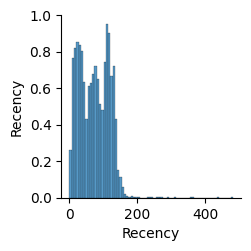

In [21]:
visualize_data(rfm_dataset)

In [22]:
elbow_method(rfm_dataset)

KeyError: "['Monetary value', 'Frequency'] not in index"

In [23]:
plot_average_spending_by_frequency(rfm_dataset)

KeyError: 'Frequency'

In [24]:
plot_payment_value_distribution(rfm_dataset)

KeyError: 'Monetary value'

In [25]:
describe_dataset(rfm_dataset)

            Recency
count  11394.000000
mean      72.950939
std       42.707211
min        0.000000
25%       34.000000
50%       73.000000
75%      110.000000
max      481.000000


In [ ]:
get_best_kmeans_params(X)

In [ ]:
clustering(clusters1, algorithm1, rand_state, X, df)

In [ ]:
plot_clusters(rfmcopy, clusters1)

In [ ]:
choose(rfm_dataset, X)

In [ ]:
silhouette_score_f(X, y, method)

In [ ]:
dendogram(X)

In [ ]:
agglomerative_clustering(X, rfmcopy)

In [ ]:
spectral_clustering(X)

In [ ]:
visualize_spectral_clusters(X, sp)

In [ ]:
show_silscores(silscores)

In [ ]:
kmeans_summary(rfmcopy)

In [ ]:
cluster_summary(df, column_name)

In [ ]:
segments_insights(rfmcopy)

ValueError: could not convert string to float: 'boleto'

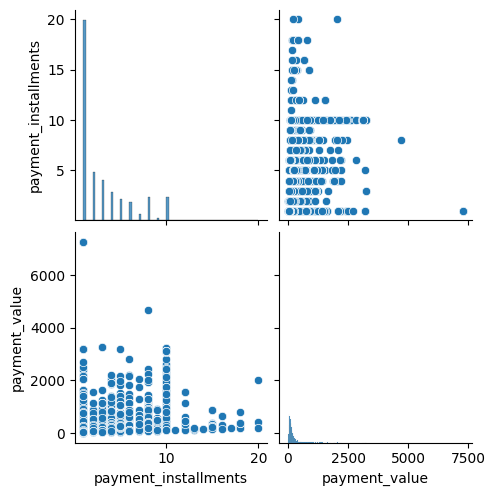

In [26]:
corr(df)

In [ ]:
installments_analysis(df, rfmcopy)

In [ ]:
customers_insights(paydf)

In [27]:
recency(recency)

TypeError: 'DataFrame' object is not callable

AttributeError: module 'matplotlib' has no attribute 'plot'

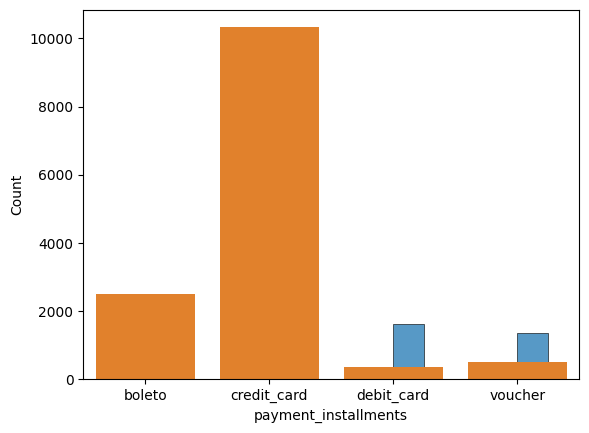

In [28]:
payments_insights(df)

c:\Users\rawbe\Downloads\IE_4thYear_1stSem\DevOps\Final_Project_DevOps\Devops_Project_Customer_Segmentation\Customer_Segmentation_DevOps\notebooks\..\src\descriptive_stats\insights.py:212: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  dfcat = pd.value_counts(df['product_category_name_english']).iloc[:15].index
c:\Users\rawbe\Downloads\IE_4thYear_1stSem\DevOps\Final_Project_DevOps\Devops_Project_Customer_Segmentation\Customer_Segmentation_DevOps\notebooks\..\src\descriptive_stats\insights.py:215: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)


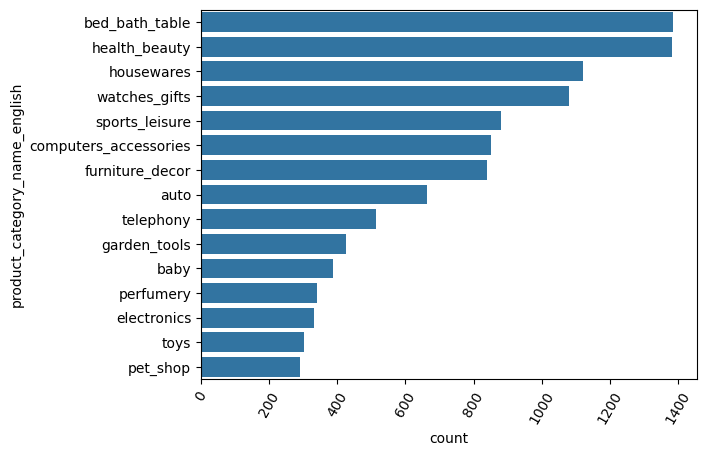

In [29]:
prod_insights(df)

c:\Users\rawbe\Downloads\IE_4thYear_1stSem\DevOps\Final_Project_DevOps\Devops_Project_Customer_Segmentation\Customer_Segmentation_DevOps\notebooks\..\src\descriptive_stats\insights.py:219: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  dfgeo = pd.value_counts(df['customer_state']).iloc[:20]
c:\Users\rawbe\Downloads\IE_4thYear_1stSem\DevOps\Final_Project_DevOps\Devops_Project_Customer_Segmentation\Customer_Segmentation_DevOps\notebooks\..\src\descriptive_stats\insights.py:221: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  dfticks = pd.value_counts(df['customer_state']).iloc[:20].index.to_list()


customer_state
SP    5986
RJ    1744
MG    1461
RS     630
PR     618
BA     532
SC     432
DF     297
ES     284
GO     272
PE     270
CE     206
MT     154
PA     150
MS     111
PB      92
MA      86
RN      81
PI      80
AL      56
Name: count, dtype: int64

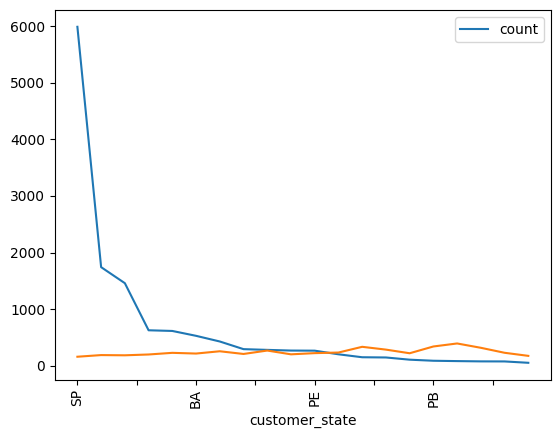

In [30]:
customer_geography(df)

In [31]:
encoding_PCA(df, rfm_dataset)

c:\Users\rawbe\anaconda3\envs\env_devops_project\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


KeyError: "['Monetary value', 'Frequency'] not in index"

In [ ]:
pca_preprocessing(newdf)

In [ ]:
pca_ncomponents(sc_features)

In [ ]:
pca_kmeans(sc_features, scores)

In [ ]:
pca_components(segmkmeans, kmeanspca, rfmcopy)